# Лабораторная работа №1. 

Данная лабораторная работа состоит из нескольких блоков. В каждом блоке вам предлагается произвести некоторые манипуляции с данными и сделать некоторые выводы.
* Задавать вопросы можно и нужно.
* Списывать не нужно. Работы, которые были списаны обнуляются.
* Блоки выполняются последовательно и оцениваются отдельно.

##  Part 2. SVM and kernels

Kernels concept get adopted in variety of ML algorithms (e.g. Kernel PCA, Gaussian Processes, kNN, ...).

So in this task you are to examine kernels for SVM algorithm applied to rather simple artificial datasets.

To make it clear: we will work with the classification problem through the whole notebook. 

In [ ]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

Let's generate our dataset and take a look on it.

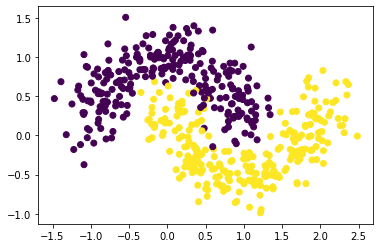

In [ ]:
moons_points, moons_labels = make_moons(n_samples=500, noise=0.2, random_state=42)
moons_points_train, moons_points_test, moons_labels_train, moons_labels_test = train_test_split(moons_points, moons_labels, test_size=0.35, random_state=42)
plt.scatter(moons_points[:, 0], moons_points[:, 1], c=moons_labels)

## 1.1 Pure models.
First let's try to solve this case with good old Logistic Regression and simple (linear kernel) SVM classifier.

Train LR and SVM classifiers (choose params by hand, no CV or intensive grid search neeeded) and plot their decision regions. Calculate one preffered classification metric.

Describe results in one-two sentences.

_Tip:_ to plot classifiers decisions you colud use either sklearn examples ([this](https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_alpha.html#sphx-glr-auto-examples-neural-networks-plot-mlp-alpha-py) or any other) and mess with matplotlib yourself or great [mlxtend](https://github.com/rasbt/mlxtend) package (see their examples for details)

_Pro Tip:_ wirte function `plot_decisions` taking a dataset and an estimator and plotting the results cause you want to use it several times below

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import f1_score, accuracy_score

from mlxtend.plotting import plot_decision_regions

lr = LogisticRegression(random_state=0, solver='liblinear') 
svm = SVC(kernel='linear', gamma = 'auto') 
lr.fit(moons_points_train, moons_labels_train)
svm.fit(moons_points_train, moons_labels_train)
predict_lr = lr.predict(moons_points_test)
predict_svm = svm.predict(moons_points_test)

print("accuracy lr %f" % accuracy_score(moons_labels_test, predict_lr))
print("accuracy svm %f" % accuracy_score(moons_labels_test, predict_svm))


accuracy lr 0.880000
accuracy svm 0.880000


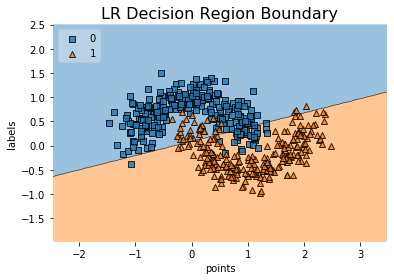

In [ ]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

# Plot Decision Region using mlxtend's plotting function
#lr
plot_decision_regions(moons_points, 
                      moons_labels,
                      clf=lr, 
                      legend=2)
plt.xlabel('points')
plt.ylabel('labels')
plt.title('LR Decision Region Boundary', size=16)
plt.show()


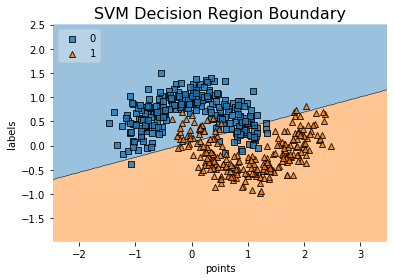

In [ ]:
#svm
plot_decision_regions(moons_points, 
                      moons_labels,
                      clf=svm, 
                      legend=2)
plt.xlabel('points')
plt.ylabel('labels')
plt.title('SVM Decision Region Boundary', size=16)
plt.show()

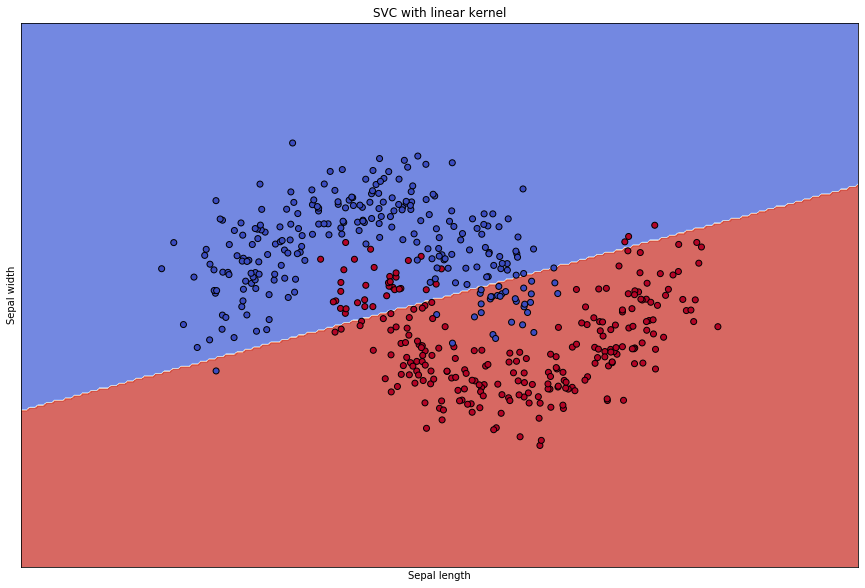

In [ ]:
plt.figure(figsize=(15,10))
h = .02  # step size in the mesh

# create a mesh to plot in
x_min, x_max = moons_points[:, 0].min() - 1, moons_points[:, 0].max() + 1
y_min, y_max = moons_points[:, 1].min() - 1, moons_points[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

plt.subplots_adjust(wspace=0.4, hspace=0.4)

Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(moons_points[:, 0], moons_points[:, 1], c=moons_labels, cmap=plt.cm.coolwarm, edgecolors='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.axis('tight')
plt.title('SVC with linear kernel')

plt.show()

## 1.2 Kernel tirck

![keep-calm](https://github.com/ml-mipt/ml-mipt/blob/basic/homeworks/Lab1_Ensembles_and_SVM/imgs/keep-calm.jpg?raw=1)

Now use different kernels (`poly`, `rbf`, `sigmoid`) on SVC to get better results. Play `degree` parameter and others.

For each kernel estimate optimal params, plot decision regions, calculate metric you've chosen eariler.

Write couple of sentences on:

* What have happenned with classification quality?
* How did decision border changed for each kernel?
* What `degree` have you chosen and why?

In [ ]:
### YOUR CODE HERE
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV

#gamma = np.logspace(-9, 3, 13)
parameters = {'kernel':['poly', 'rbf', 'sigmoid'],'C':[0.1, 1, 10], 'gamma': np.arange( 0.0, 10.0+0.0, 0.1 )}

scorer = make_scorer(f1_score)

grid_obj = GridSearchCV(svm, parameters, scoring=scorer)
grid_fit = grid_obj.fit(moons_points, moons_labels)
best_clf = grid_fit.best_estimator_

best_clf.fit(moons_points, moons_labels)
predict_model = best_clf.predict(moons_points_test)
print("best accuracy %f" % accuracy_score(moons_labels_test, predict_model))
f = grid_obj.best_params_
print(f)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


best accuracy 0.994286
{'C': 10, 'gamma': 1.7000000000000002, 'kernel': 'rbf'}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


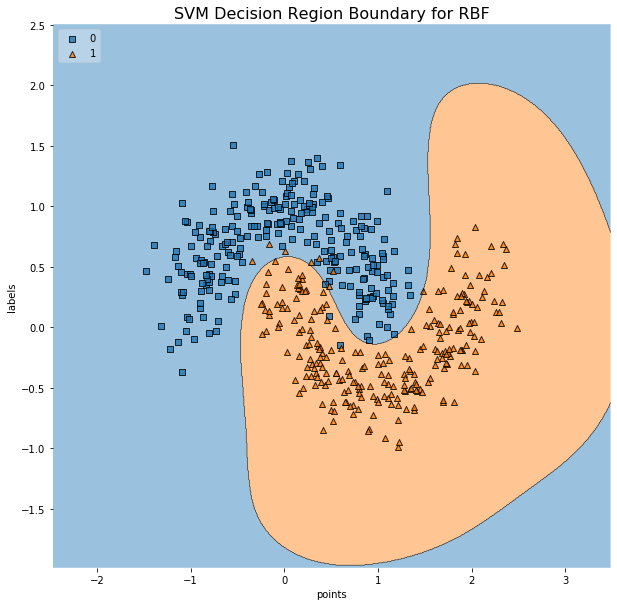

In [ ]:
#How did decision border changed for kernel?
plt.figure(figsize=(10,10))

rbf = SVC(kernel = 'rbf', gamma = f['gamma'])
rbf.fit(moons_points_train, moons_labels_train)

plot_decision_regions(moons_points, 
                      moons_labels,
                      clf=rbf, 
                      legend=2)
plt.xlabel('points')
plt.ylabel('labels')
plt.title('SVM Decision Region Boundary for RBF', size=16)
plt.show()

## 1.3 Simpler solution (of a kind)
What is we could use Logisitc Regression to successfully solve this task?

Feature generation is a thing to help here. Different techniques of feature generation are used in real life, couple of them will be covered in additional lectures.

In particular case simple `PolynomialFeatures` ([link](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)) are able to save the day.

Generate the set of new features, train LR on it, plot decision regions, calculate metric.

* Comare SVM's results with this solution (quality, borders type)
* What degree of PolynomialFeatures have you used? Compare with same SVM kernel parameter.

(500, 2) (500, 6)


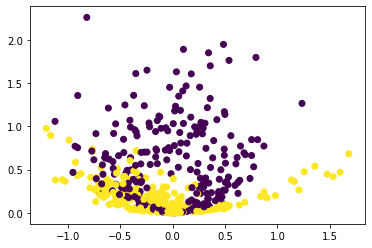

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(2)
transform = poly.fit_transform(moons_points)
print(moons_points.shape, transform.shape)

transform_train, transform_test, moons_labels_train, moons_labels_test = train_test_split(transform, moons_labels, test_size=0.35, random_state=42)
plt.scatter(transform[:, 4], transform[:, 5], c=moons_labels)

In [ ]:
l = LogisticRegression(random_state=0, solver='liblinear')
l.fit(transform_train, moons_labels_train)
predict_l = l.predict(transform_test)
print("accuracy lr %f" % accuracy_score(moons_labels_test, predict_l))

accuracy lr 0.880000


best f1-score: 0.96875
degree: 6


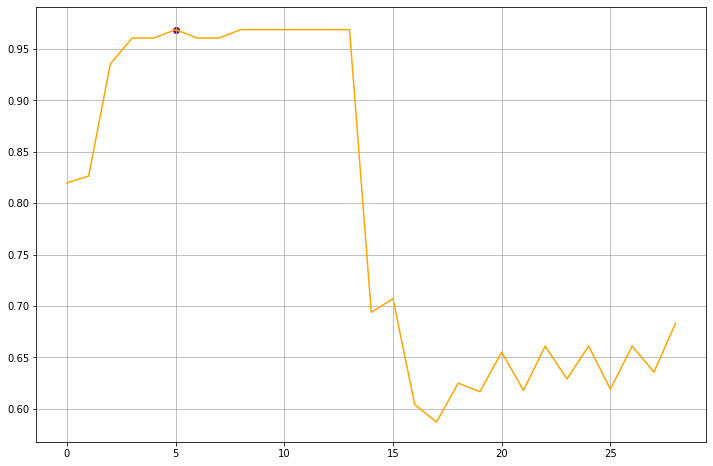

In [ ]:
#best results

from sklearn.preprocessing import PolynomialFeatures

accuracy = []
for degree in range(1, 30):
    poly = PolynomialFeatures(degree)
    transform = poly.fit_transform(moons_points)

    transform_train, transform_test, moons_labels_train, moons_labels_test = train_test_split(transform, moons_labels, test_size=0.35, random_state=42)     
    transform_train, transform_valid, moons_labels_train, moons_labels_valid = train_test_split(transform_train, moons_labels_train, test_size=0.35, random_state=42)                                                                                   
    lr = LogisticRegression(random_state=0, solver='liblinear', multi_class='ovr')
    lr.fit(transform_train, moons_labels_train)
    pred_l = lr.predict(transform_valid)
    accuracy.append(f1_score(moons_labels_valid, pred_l))
    
#plot  
plt.figure(figsize=(12,8))
plt.plot(accuracy, color = 'orange');
plt.grid()
plt.scatter(accuracy.index(max(accuracy)), max(accuracy), color = 'purple', marker='o')

print('best f1-score: {}\ndegree: {}'.format(max(accuracy), accuracy.index(max(accuracy)) + 1))





## 1.4 Harder problem

Let's make this task a bit more challenging via upgrading dataset:

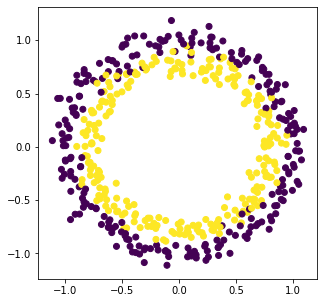

In [ ]:
from sklearn.datasets import make_circles

circles_points, circles_labels = make_circles(n_samples=500, noise=0.06, random_state=42)

plt.figure(figsize=(5, 5))
plt.scatter(circles_points[:, 0], circles_points[:, 1], c=circles_labels)

circles_points_train, circles_points_test, circles_labels_train, circles_labels_test = train_test_split(circles_points, circles_labels, test_size=0.35, random_state=42)


In [ ]:
Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]
param_grid = {'C': Cs, 'gamma' : gammas}
grid_search = GridSearchCV(SVC(kernel='rbf'), param_grid)
grid_search.fit(circles_points_train, circles_labels_train)
grid_search.best_params_
print(grid_search.best_params_)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'C': 1, 'gamma': 1}


In [ ]:
svc = SVC(kernel = 'rbf',  gamma=1)
svc.fit(circles_points_train, circles_labels_train)
predict_svc = svc.predict(circles_points_test)
print("accuracy lr %f" % accuracy_score(circles_labels_test, predict_svc))

accuracy lr 0.942857


In [ ]:
degrees = np.arange( 0, 100+0, 1 )
param_grid = {'degree' : degrees}
grid_search = GridSearchCV(SVC(kernel='poly'), param_grid)
grid_search.fit(circles_points_train, circles_labels_train)
n = grid_search.best_params_
print(grid_search.best_params_)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in v

{'degree': 2}


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default 

In [ ]:
svc_poly = SVC(kernel = 'poly', degree = n['degree'])
fit = svc_poly.fit(circles_points_train, circles_labels_train)
predict_svc_poly = svc_poly.predict(circles_points_test)

print("accuracy lr %f" % accuracy_score(circles_labels_test, predict_svc_poly))


accuracy lr 0.960000


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


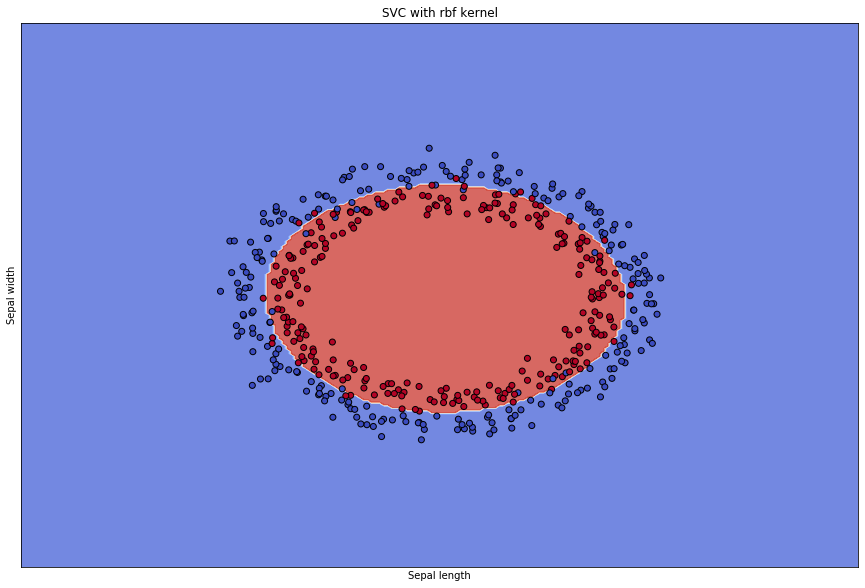

f1 rbf 0.943182


In [ ]:
plt.figure(figsize=(15,10))
h = .02  # step size in the mesh

# create a mesh to plot in
x_min, x_max = circles_points[:, 0].min() - 1, circles_points[:, 0].max() + 1
y_min, y_max = circles_points[:, 1].min() - 1, circles_points[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

plt.subplots_adjust(wspace=0.4, hspace=0.4)

Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(circles_points[:, 0], circles_points[:, 1], c=circles_labels, cmap=plt.cm.coolwarm, edgecolors='k')

plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.axis('tight')
plt.title('SVC with rbf kernel')

plt.show()

print("f1 rbf %f" % f1_score(circles_labels_test, predict_svc))

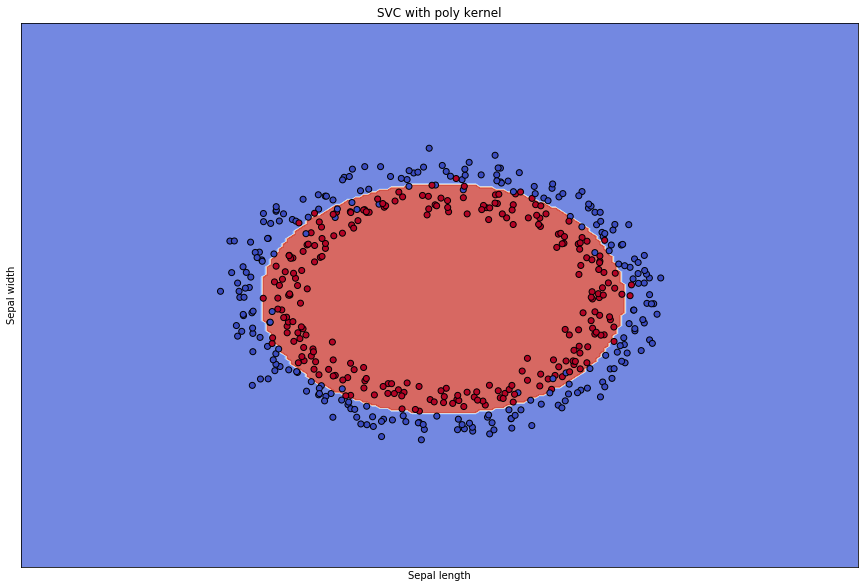

f1 poly 0.960894


In [ ]:
plt.figure(figsize=(15,10))
h = .02  # step size in the mesh

# create a mesh to plot in
x_min, x_max = circles_points[:, 0].min() - 1, circles_points[:, 0].max() + 1
y_min, y_max = circles_points[:, 1].min() - 1, circles_points[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

plt.subplots_adjust(wspace=0.4, hspace=0.4)

Z = svc_poly.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(circles_points[:, 0], circles_points[:, 1], c=circles_labels, cmap=plt.cm.coolwarm, edgecolors='k')

plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.axis('tight')
plt.title('SVC with poly kernel')

plt.show()

print("f1 poly %f" % f1_score(circles_labels_test, predict_svc_poly))

In [ ]:
lr = LogisticRegression(random_state=0, solver='saga')
fit_lr = lr.fit(circles_points_train, circles_labels_train)
predict_lr = fit_lr.predict(circles_points_test)
print("accuracy %f" % accuracy_score(circles_labels_test, predict_lr))

accuracy 0.457143


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_

best f1-score: 0.9268292682926829
degree: 3


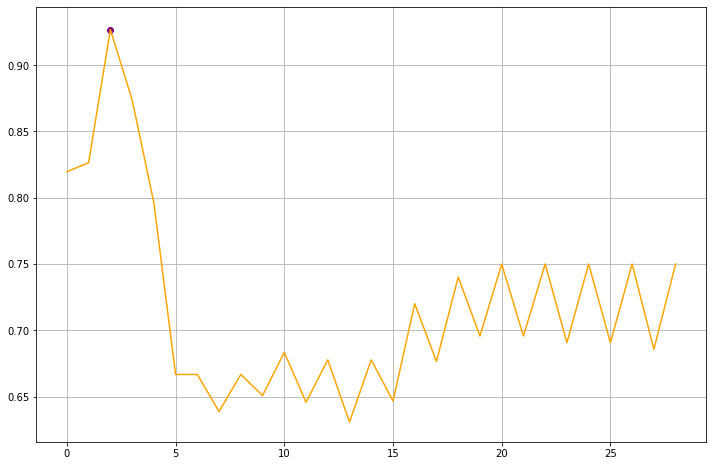

In [ ]:
#best results

accuracy = []
for degree in range(1, 30):
    poly = PolynomialFeatures(degree)
    transform = poly.fit_transform(moons_points)

    transform_train, transform_test, circles_labels_train, circles_labels_test = train_test_split(transform, circles_labels, test_size=0.35, random_state=42)     
    transform_train, transform_valid, circles_labels_train, circles_labels_valid = train_test_split(transform_train, circles_labels_train, test_size=0.35, random_state=42)                                                                                   
    lr = LogisticRegression(random_state=0, solver='saga')
    lr.fit(transform_train, circles_labels_train)
    pred_lr = lr.predict(transform_valid)
    accuracy.append(f1_score(circles_labels_valid, pred_lr))
    
#plot  
plt.figure(figsize=(12,8))
plt.plot(accuracy, color = 'orange');
plt.grid()
plt.scatter(accuracy.index(max(accuracy)), max(accuracy), color = 'purple', marker='o')

print('best f1-score: {}\ndegree: {}'.format(max(accuracy), accuracy.index(max(accuracy)) + 1))

And even more:

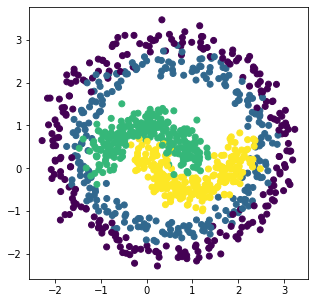

In [ ]:
points = np.vstack((circles_points*2.5 + 0.5, moons_points))
labels = np.hstack((circles_labels, moons_labels + 2)) # + 2 to distinct moons classes

plt.figure(figsize=(5, 5))
plt.scatter(points[:, 0], points[:, 1], c=labels)

In [ ]:
lr = LogisticRegression(random_state=42, solver='saga')
svm = SVC(kernel='linear', C = 10)
svm.fit(points_train, labels_train)
lr.fit(points_train, labels_train)
predict_lr = lr.predict(points_test)
predict_svm = svm.predict(points_test)

print("accuracy lr %f" % accuracy_score(labels_test, predict_lr))
print("accuracy svm linear %f" % accuracy_score(labels_test, predict_svm))

In [ ]:
#lr
plot_decision_regions(points, 
                      labels,
                      clf=lr, 
                      legend=2)
plt.xlabel('points')
plt.ylabel('labels')
plt.title('LR Decision Region Boundary', size=16)
plt.show()

Now do your best using all the approaches above!

Tune LR with generated features, SVM with appropriate kernel of your choice. You may add some of your loved models to demonstrate their (and your) strength. Again plot decision regions, calculate metric.

Justify the results in a few phrases.

In [ ]:
Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]
param_grid = {'C': Cs, 'gamma' : gammas}
grid_search = GridSearchCV(SVC(kernel='rbf'), param_grid)
grid_search.fit(points_train, labels_train)
grid_search.best_params_
print(grid_search.best_params_)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


{'C': 1, 'gamma': 1}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [ ]:
svc = SVC(kernel = 'rbf',  gamma=1)
svc.fit(points_train, labels_train)
predict_svc = svc.predict(points_test)
print("accuracy lr %f" % accuracy_score(labels_test, predict_svc))

accuracy lr 0.937143


In [ ]:
svc_poly = SVC(kernel = 'poly', degree = n['degree'])
fit = svc_poly.fit(points_train, labels_train)
predict_svc_poly = svc_poly.predict(points_test)

print("accuracy lr %f" % accuracy_score(labels_test, predict_svc_poly))


In [ ]:
#How did decision border changed for kernel?
plt.figure(figsize=(10,10))

rbf = SVC(kernel = 'rbf', gamma = grid_search.best_params_['gamma'])
rbf.fit(points_train, labels_train)

plot_decision_regions(points, labels, clf=rbf, legend=2)
plt.xlabel('points')
plt.ylabel('labels')
plt.title('SVM Decision Region Boundary for RBF', size=16)
plt.show()

In [ ]:
### YOUR CODE HERE